In [2]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import re
import pandas as pd
from shapely.geometry import Point

In [11]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

/tmp/ipykernel_968161/3919767049.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


# Plot world

In [ ]:
# initialize an empty figure and add an axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# plot a basic map of the world
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Basic Map of World with GeoPandas")
plt.show()


# Plot airports in the world map

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Example DataFrame with airport data

df = pd.read_csv('/home/murat/Projects/satellitepy/data/airport_list.csv')
# airport_df['country'] 
# data = {
#     'iata': ['SIN', 'CDG', 'DFW', 'DEN', 'ORD', 'MCO', 'IAH', 'YYZ', 'CGK', 'CAN', 'DMM', 'PKX', 'PVG', 'CAI', 'BKK', 'IST', 'SZX', 'FRA', 'CTU', 'IAD', 'CKG', 'PEK', 'JFK', 'HND', 'ATL', 'DXB', 'MIA', 'CLT', 'LAS'],    'latitude': [1.3644, 49.0097, 32.8968, 39.8561, 41.9786, 28.4312, 29.9902, 43.6777, -6.1256, 23.3924, 26.4711, 39.5094, 31.1443, 30.1219, 13.6811, 41.2753, 22.6393, 50.0379, 30.5785, 38.9531, 29.7192, 40.0801, 40.6413, 35.5494, 33.6407, 25.2532, 25.7933, 35.214, 36.08],
#     'longitude': [103.9915, 2.5479, -97.0372, -104.6737, -87.9048, -81.3081, -95.3368, -79.6248, 106.6559, 113.2988, 49.7974, 116.4125, 121.8092, 31.4059, 100.7473, 28.9775, 113.8108, 8.5622, 103.9472, -77.4565, 106.6417, 116.5846, -73.7781, 139.7798, -84.4277, 55.3657, -80.2906, -80.9431, -115.151],
#     'continent': ['Asia', 'Europe', 'North America', 'North America', 'North America', 'North America', 'North America', 'North America', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Africa', 'Asia', 'Europe', 'Asia', 'Europe', 'Asia', 'North America', 'Asia', 'Asia', 'North America', 'Asia', 'North America', 'Asia', 'North America', 'North America', 'North America'],
#     'country': ['Singapore', 'France', 'United States', 'United States', 'United States', 'United States', 'United States', 'Canada', 'Indonesia', 'China', 'Saudi Arabia', 'China', 'China', 'Egypt', 'Thailand', 'Turkey', 'China', 'Germany', 'China', 'United States', 'China', 'China', 'United States', 'Japan', 'United States', 'United Arab Emirates', 'United States', 'United States', 'United States']
#     }
# df = pd.DataFrame(data)

# values, count_per_continent = np.unique(airport_df['continent'], return_counts=True)
# print(values)
# print(f"Number of uniequ countries: {len(values)}")
# print(count_per_continent)
# print(f"Sum of images: {sum(count_per_continent)}")

print(len(np.unique(df['Airport Code'])))

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame from the airport data
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10))
# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

world.plot(ax=ax, color='lightgrey')

# Plot the airports
gdf.plot(ax=ax, color='red', markersize=20, marker='o')

# Annotate the airports with their IATA codes
texts = []
airport_code_set = []
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Airport Code']):
    if label in airport_code_set:
        continue
    else:
        airport_code_set.append(label)
    texts.append(ax.text(x, y, label, fontsize=7, ha='right', color='black'))

# Adjust text to prevent overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))

# Set plot title and show the plot
plt.title('Airport Locations on World Map')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# Remove axis
ax.set_axis_off()

# Tight layout
plt.tight_layout()
plt.savefig('/home/murat/Projects/satellitepy/docs/paper/airport_locations_map.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


In [12]:
print(len(np.unique(data['iata'])))

29


In [ ]:
# def dms2dd(s):
#     # example: s = """0°51'56.29"S"""
#     degrees, minutes, seconds, direction = re.split('[°\'"]+', s)
#     dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
#     if direction in ('S','W'):
#         dd*= -1
#     return dd




# Plot all classes in a graph

In [ ]:
import plotly.express as px
import pandas as pd

# Sample data
data = {
    'Level 1': ['airplane', 'airplane', 'airplane', 'airplane', 'airplane'],
    'Level 2': ['A320', 'A320', 'A320', 'B737', 'B737'],
    'Level 3': ['A320-211', 'A320-232', 'A320-211', 'B737-800', 'B737-900']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting
fig = px.sunburst(df, path=['Level 1', 'Level 2', 'Level 3'], title='Distribution of Classes at Three Levels')
fig.show()

# Display a large image

In [2]:
import cv2

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
img_path = '/mnt/2tb-1/satellitepy/exp/image_result/Amsterdam_23MAR14104929.png'
# img = cv2.imread(img_path)
with rasterio.open(img_path) as src:
    # Read the image as a numpy array
    img = src.read()

    # Get image metadata
    metadata = src.meta

    img_cv = np.transpose(img, axes=(1, 2, 0))


plt.imshow(img_cv)

## Cut out the image

In [ ]:
y_0 = 19000
y_1 = 21000
x_0 = 10000
x_1 = 15000

img_cutout = img_cv[y_0:y_1,x_0:x_1,:]
plt.imshow(img_cutout)
cv2.imwrite('/home/murat/Projects/satellitepy/docs/paper/detections/detection.png',img_cutout)


In [3]:
height, width = img_cv.shape[:2]

# Calculate the new dimensions
new_width = int(width * 0.2)
new_height = int(height * 0.2)

# Resize the image
img_cv_resized = cv2.resize(img_cv, (new_width, new_height))
img_cv_resized.shape

(6022, 4752, 3)

In [6]:
cv2.imwrite('/mnt/2tb-1/satellitepy/exp/image_result/resized.png',img_cv_resized)

True

In [13]:
import plotly.graph_objects as go

# Data
classes = ['A', 'B', 'C']
sizes = [10, 20, 30]

# Create the bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=['Distribution'],
    x=[sizes[0]],
    text='Class A',
    textposition='inside',
    insidetextanchor='middle',
    orientation='h',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    y=['Distribution'],
    x=[sizes[1]],
    text='Class B',
    textposition='inside',
    insidetextanchor='middle',
    orientation='h',
    marker=dict(color='orange')
))

fig.add_trace(go.Bar(
    y=['Distribution'],
    x=[sizes[2]],
    marker_line=dict(width=2, color='black'),
    
    text='Class C',
    textposition='inside',
    insidetextanchor='middle',
    orientation='h',
    marker=dict(color='green')
))

# Update layout
fig.update_layout(
    barmode='stack',
    title='Distribution of Classes A, B, and C',
    xaxis_title='Size',
    yaxis_title='Classes',
    yaxis=dict(tickvals=['Distribution'], ticktext=['Classes A, B, and C']),
    legend_title='Classes'
)
fig.show()


# confusion matrix

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns



# Load the confusion matrix CSV file to inspect its content

file_path = '/home/murat/Projects/satellitepy/docs/paper/conf_matrix.csv'

conf_matrix = pd.read_csv(file_path, index_col=0)

# Remove the specified labels (A380, A340, and E190) from the confusion matrix
labels_to_remove = ['A380', 'A340', 'E190']
filtered_matrix = conf_matrix.drop(labels=labels_to_remove, axis=0).drop(labels=labels_to_remove, axis=1)


# Normalize the confusion matrix row-wise (divide each row by its sum)
row_normalized_matrix = filtered_matrix.div(filtered_matrix.sum(axis=1), axis=0)

# Plot the row-normalized confusion matrix
plt.figure(figsize=(18, 14))
ax = sns.heatmap(
    row_normalized_matrix,
    annot=True,
    fmt=".2f",  # Format to show two decimal places
    cmap="viridis",
    # cbar_kws={'label': 'Proportion'},
    linewidths=0.5
)

# Update axis labels and title
ax.set_xlabel('Predicted Labels', fontsize=20)
ax.set_ylabel('True Labels', fontsize=20)
ax.set_title('FineAir30 Confusion Matrix', fontsize=25)

# Adjust x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show the normalized heatmap
plt.tight_layout()
plt.show()


# object dimension distribution

In [1]:
import matplotlib.pyplot as plt
from satellitepy.data.labels import read_label
from satellitepy.utils.path_utils import get_file_paths
from satellitepy.data.bbox import BBox
from pathlib import Path
import numpy as np

In [2]:
labels_dict = {'/mnt/2tb-0/satellitepy/data/DOTA/train/bounding_boxes/':'dota'}#, '/mnt/2tb-0/satellitepy/data/xview/train_labels/satpy_labels/':'satellitepy'}
# labels_dict = {'/mnt/2tb-0/satellitepy/data/Gaofen/train/label_xml/':'fair1m', '/mnt/2tb-0/satellitepy/data/Rareplanes/train/split_labels/labels/':'rareplanes_real'}
# labels_dict = {'/mnt/2tb-0/satellitepy/data/VEDAI/Annotations1024/':'vedai'}

In [3]:
# Ignore VHR and DIOR
obj_dim_dict =  {dataset_name:{'cgc':{}, 'role':{}} for dataset_name in labels_dict.values()}
for label_folder, label_format in labels_dict.items():
    for label_path in get_file_paths(Path(label_folder)):
        labels = read_label(label_path,label_format)
        cgc_values = labels['coarse-class']
        role_values = labels['role']
        for i, bbox_corners in enumerate(labels['obboxes']):
            my_bbox = BBox(corners=bbox_corners)
            cx, cy, width, height, angle = my_bbox.get_params()
            if cgc_values[i] not in obj_dim_dict[label_format]['cgc']:
                obj_dim_dict[label_format]['cgc'][cgc_values[i]] = {'w':[width],'h':[height]}
            else:
                obj_dim_dict[label_format]['cgc'][cgc_values[i]]['w'].append(width)
                obj_dim_dict[label_format]['cgc'][cgc_values[i]]['h'].append(height)
            if role_values[i] not in obj_dim_dict[label_format]['role']:
                obj_dim_dict[label_format]['role'][role_values[i]] = {'w':[width],'h':[height]}
            else:
                obj_dim_dict[label_format]['role'][role_values[i]]['w'].append(width)
                obj_dim_dict[label_format]['role'][role_values[i]]['h'].append(height)
# # print(obj_dim_dict)

[ 14.31782106 377.08577787]
[ 13.29928766 391.54493414]


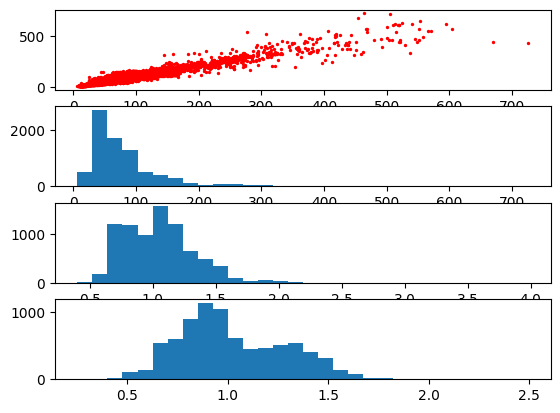

In [19]:
w_values = obj_dim_dict['dota']['cgc']['airplane']['w']
h_values = obj_dim_dict['dota']['cgc']['airplane']['h']
# print(f"Mean width and length: {np.mean(w_values)}, {np.mean(h_values)}")
# print(np.percentile(np.array(w_values)/np.array(h_values),q=[5,95]))
# print(np.percentile(np.array(h_values)*np.array(w_values),q=[1,99]))
print(np.percentile(w_values,q=[1,99]))
print(np.percentile(h_values,q=[1,99]))
# print(np.percentile(np.array(w_values)/np.array(h_values)))
fig, ax = plt.subplots(4)
# ax[0].scatter(obj_dim_dict['rareplanes_real']['cgc']['airplane']['w'],obj_dim_dict['rareplanes_real']['cgc']['airplane']['h'],s=2,c='b')
ax[0].scatter(obj_dim_dict['dota']['cgc']['airplane']['w'],obj_dim_dict['dota']['cgc']['airplane']['h'],s=2,c='r')

ax[1].hist(w_values,bins=30)
# ax[2].hist(h_values,bins=30)
ax[3].hist(np.array(w_values)/np.array(h_values),bins=30)
ax[2].hist(np.array(h_values)/np.array(w_values),bins=30)
plt.show()

In [28]:
scaling_factor = 50/30
for role in obj_dim_dict['fair1m']['role'].keys():
    for dim in obj_dim_dict['fair1m']['role'][role].keys():
        obj_dim_dict['fair1m']['role'][role][dim] = np.array(obj_dim_dict['fair1m']['role'][role][dim]) * scaling_factor

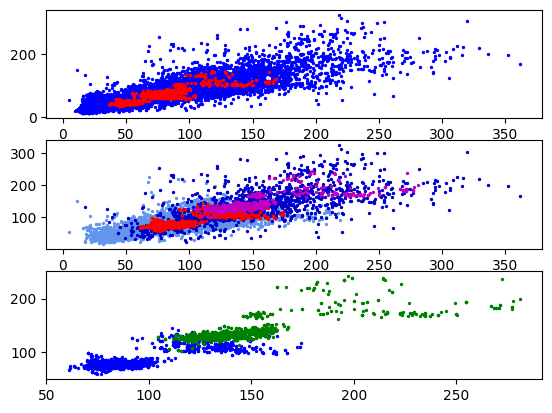

In [31]:

fig, ax = plt.subplots(3)
ax[0].scatter(obj_dim_dict['rareplanes_real']['cgc']['airplane']['w'],obj_dim_dict['rareplanes_real']['cgc']['airplane']['h'],s=2,c='b')
ax[0].scatter(obj_dim_dict['fair1m']['cgc']['airplane']['w'],obj_dim_dict['fair1m']['cgc']['airplane']['h'],s=2,c='r')

# ax[1].scatter(obj_dim_dict['rareplanes_real']['role']['Small Civil Transport/Utility']['w'],obj_dim_dict['rareplanes_real']['role']['Small Civil Transport/Utility']['h'],s=2,c='r')
ax[1].scatter(obj_dim_dict['rareplanes_real']['role']['Medium Civil Transport/Utility']['w'],obj_dim_dict['rareplanes_real']['role']['Medium Civil Transport/Utility']['h'],s=2,c='cornflowerblue')
ax[1].scatter(obj_dim_dict['rareplanes_real']['role']['Large Civil Transport/Utility']['w'],obj_dim_dict['rareplanes_real']['role']['Large Civil Transport/Utility']['h'],s=2,c='mediumblue')
ax[1].scatter(obj_dim_dict['fair1m']['role']['Medium Civil Transport/Utility']['w'],obj_dim_dict['fair1m']['role']['Medium Civil Transport/Utility']['h'],s=2,c='r')
ax[1].scatter(obj_dim_dict['fair1m']['role']['Large Civil Transport/Utility']['w'],obj_dim_dict['fair1m']['role']['Large Civil Transport/Utility']['h'],s=2,c='m')

ax[2].scatter(obj_dim_dict['fair1m']['role']['Medium Civil Transport/Utility']['w'],obj_dim_dict['fair1m']['role']['Medium Civil Transport/Utility']['h'],s=2,c='b')
ax[2].scatter(obj_dim_dict['fair1m']['role']['Large Civil Transport/Utility']['w'],obj_dim_dict['fair1m']['role']['Large Civil Transport/Utility']['h'],s=2,c='g')


plt.show()